## Problem 1 (Weighted RLS with Ridge regression)

### 1. Load libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import linear_model
import matplotlib.pyplot as plt

### 2. Prepare Data
- Load data
- Split data to training and test data

In [12]:
## Load data
df = pd.read_csv('tsp_dataset/monthly-mean-temp.csv', header=0)
df.head()

,Month,Temperature
0,1920-01,40.6
1,1920-02,40.8
2,1920-03,44.4
3,1920-04,46.7
4,1920-05,54.1


In [13]:
# Make Training data & Test data (Split data 8:2)
train_length = int(len(df) * 0.8) # use 80% data for training.
train_data = df[:train_length]
X_train = train_data.loc[:, train_data.columns != 'y_k'].to_numpy()
Y_train = train_data.loc[:, train_data.columns == 'y_k'].to_numpy()
test_data = df[train_length:]
X_test = test_data.loc[:, test_data.columns != 'y_k'].to_numpy()
Y_test = test_data.loc[:, test_data.columns == 'y_k'].to_numpy()


3 weighted RLS 

In [14]:
# Define RLS function 
# Input: X, Y, initial theta, initial Pk, lambda (We used 1/lambda as lambda here.)
# Output: Final Pk, theta_list 
def RLS(X, Y, theta_0, Pk, lamb):
    theta = []
    for k in range(len(X)):
        phi_k1 = X[k].reshape(dim,1)
        G_k = lamb*Pk.dot(phi_k1) / (1 + lamb*phi_k1.T.dot(Pk).dot(phi_k1))
        P_next = lamb*Pk - lamb*G_k.dot(phi_k1.T).dot(Pk)
        theta_next = theta_0 + (G_k * (Y[k]-(phi_k1.T).dot(theta_0))) 
        # estimation and prediction results
        theta.append(theta_next)

        #update
        theta_0 = theta_next
        Pk = P_next
    return Pk, theta

In [15]:
# Define function of RLS Prediction (Prediction does not use ground-truth y. Instead, use the predicted y.)
# Input: X, initial theta, initial Pk, lambda
# Output: list of predicted y, theta_list 

def PredictRLS(X, theta_0, Pk, lamb):
    theta = []
    pred_y = []
    for k in range(len(X)):
        phi_k1 = X[k].reshape(dim,1)
        G_k = lamb*Pk.dot(phi_k1) / (1 + lamb*phi_k1.T.dot(Pk).dot(phi_k1))
        P_next = lamb*Pk - lamb*G_k.dot(phi_k1.T).dot(Pk)
        #### Use predicted Y, not GT Y
        y_k = X[k]@theta_0
        pred_y.append(y_k)
        theta_next = theta_0 + (G_k * (y_k-(phi_k1.T).dot(theta_0))) 

        # estimation and prediction results
        theta.append(theta_next)
        #update
        theta_0 = theta_next
        Pk = P_next
    return pred_y, theta

In [16]:
# Change hyperparameter lambda, (1/lambda) and see the results. 
dim=4
theta_0=np.array([0,0,0,0])
theta_0= theta_0.reshape(dim, 1)
Pk=-0.3*np.eye(dim,dim)
lamb = 1 # inverse of lambda

Pk, theta_train = RLS(X_train, Y_train, theta_0, Pk, lamb)
pred_y, theta_test = PredictRLS(X_test, theta_train[-1], Pk, 1)

ValueError: cannot reshape array of size 2 into shape (4,1)

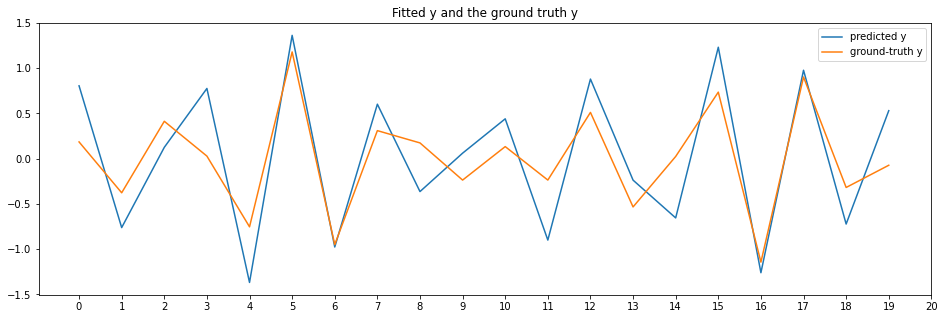

In [7]:
## Plot graph. 

plt.rcParams["figure.figsize"] = (16, 5)
plt.plot(pred_y, label='predicted y')
plt.plot(Y_test, label='ground-truth y')
plt.legend()
plt.xticks(np.arange(0, len(pred_y)+1, 1))
plt.title("Fitted y and the ground truth y")
plt.show()

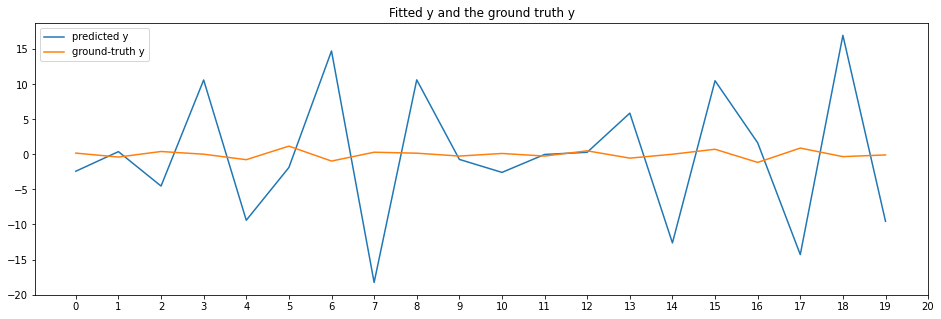

In [8]:
# Change hyperparameter lambda, (1/lambda) and see the results. 
dim=4
theta_0= theta_0.reshape(dim, 1)
Pk=-0.3*np.eye(dim,dim)
lamb = 1/1.25 # inverse of lambda

Pk, theta_train = RLS(X_train, Y_train, theta_0, Pk, lamb)
pred_y, theta_test = PredictRLS(X_test, theta_train[-1], Pk, lamb)

plt.rcParams["figure.figsize"] = (16, 5)
plt.plot(pred_y, label='predicted y')
plt.plot(Y_test, label='ground-truth y')
plt.legend()
plt.xticks(np.arange(0, len(pred_y)+1, 1))
plt.title("Fitted y and the ground truth y")
plt.show()

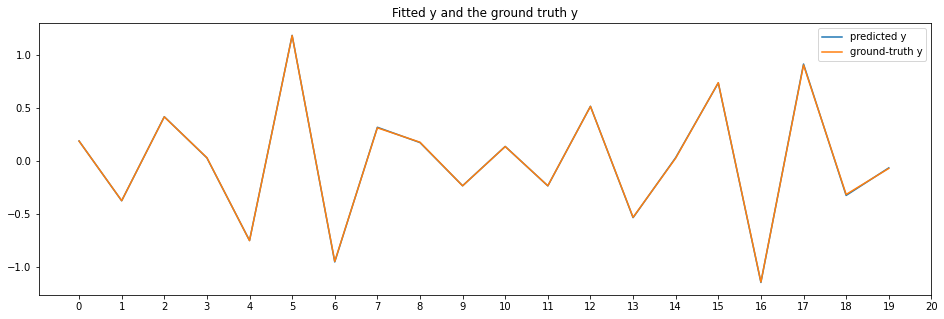

In [9]:
# Change hyperparameter lambda, (1/lambda) and see the results. 
dim=4
theta_0= theta_0.reshape(dim, 1)
Pk=-0.3*np.eye(dim,dim)
lamb = 1/0.8 # inverse of lambda

Pk, theta_train = RLS(X_train, Y_train, theta_0, Pk, lamb)
pred_y, theta_test = PredictRLS(X_test, theta_train[-1], Pk, lamb)

plt.rcParams["figure.figsize"] = (16, 5)
plt.plot(pred_y, label='predicted y')
plt.plot(Y_test, label='ground-truth y')
plt.legend()
plt.xticks(np.arange(0, len(pred_y)+1, 1))
plt.title("Fitted y and the ground truth y")
plt.show()

### Plot theta 

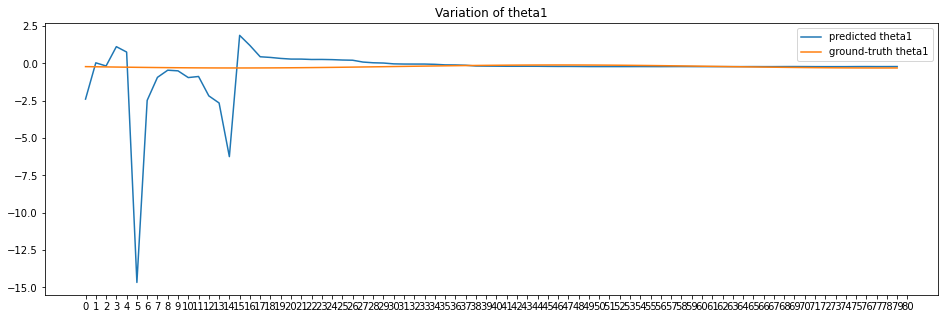

In [10]:
theta = np.array(theta_train).squeeze()
gt_theta = -(0.2+0.1*np.sin(np.linspace(1, 80, 80)*0.1))

plt.rcParams["figure.figsize"] = (16, 5)
plt.plot(theta[:, 0], label='predicted theta1')
plt.plot(gt_theta, label='ground-truth theta1')
plt.legend()
plt.xticks(np.arange(0, len(theta)+1, 1))
plt.title("Variation of theta1")
plt.show()

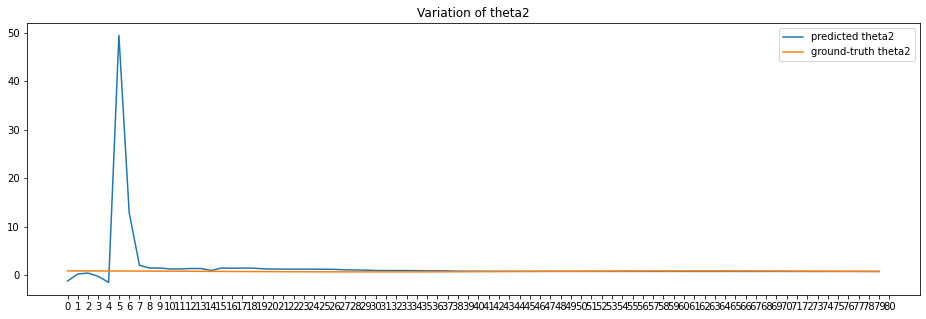

In [11]:
theta = np.array(theta_train).squeeze()
gt_theta = (0.79+0.1*np.cos(np.linspace(1, 80, 80)*0.1))

plt.rcParams["figure.figsize"] = (16, 5)
plt.plot(theta[:, 1], label='predicted theta2')
plt.plot(gt_theta, label='ground-truth theta2')
plt.legend()
plt.xticks(np.arange(0, len(theta)+1, 1))
plt.title("Variation of theta2")
plt.show()